In [15]:
!pip install scikit-learn-extra

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

In [17]:
file_path = '/content/TEST.csv'
data = pd.read_csv(file_path, index_col=0)


data.head()

,followersCount,friendsCount,768938323612008448,736409486949122048,745695548246720513,715886426387120129,713030233054511105,707387411316080642,746928595075891200,742586336440254464,...,2422636526,430342127,820051950,2344386542,129400817,153845743,20250612,145129460,3390046198,394297339
id,,,,,,,,,,,,,,,,,,,,,
1969527638,319,112,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51878493,275,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1393409100,120,107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232891415,492,325,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710130422907207680,128,218,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data.columns

Index(['followersCount', 'friendsCount', '768938323612008448',
       '736409486949122048', '745695548246720513', '715886426387120129',
       '713030233054511105', '707387411316080642', '746928595075891200',
       '742586336440254464',
       ...
       '2422636526', '430342127', '820051950', '2344386542', '129400817',
       '153845743', '20250612', '145129460', '3390046198', '394297339'],
      dtype='object', length=19659)

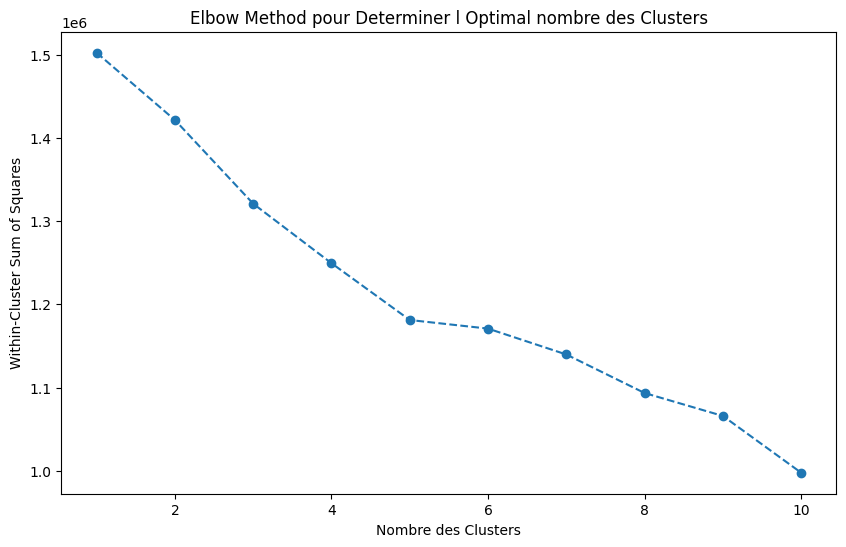

In [19]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

pca = PCA(n_components=50)
data_pca = pca.fit_transform(normalized_data)

#data_pca = normalized_data

def plot_elbow_method(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method pour Determiner l Optimal nombre des Clusters')
    plt.xlabel('Nombre des Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.show()

plot_elbow_method(data_pca, max_clusters=10)


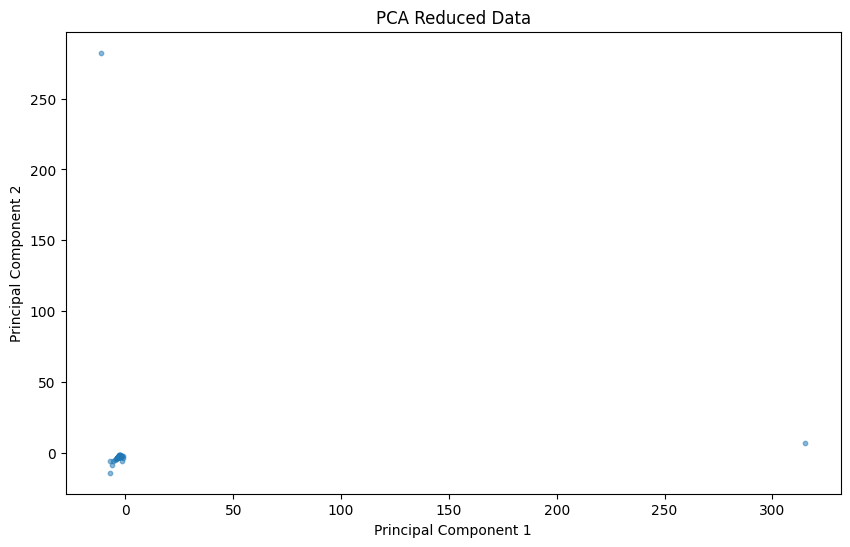

In [20]:
pcaa = PCA(n_components=2)
data_pca2d = pcaa.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca2d[:, 0], data_pca2d[:, 1], s=10, alpha=0.5)
plt.title('PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


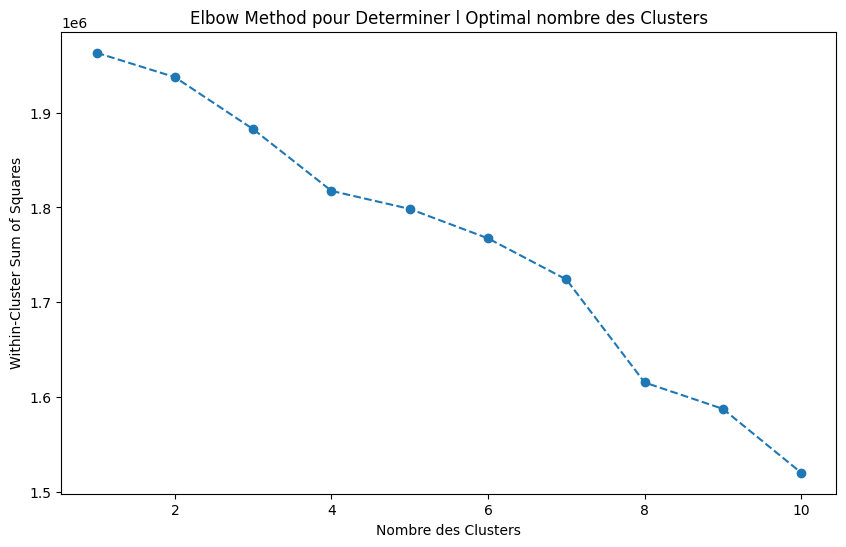

In [21]:
# MDS pour elbow method
mds = MDS(n_components=50, random_state=42)
data_mds = mds.fit_transform(normalized_data)
plot_elbow_method(data_mds, max_clusters=10)

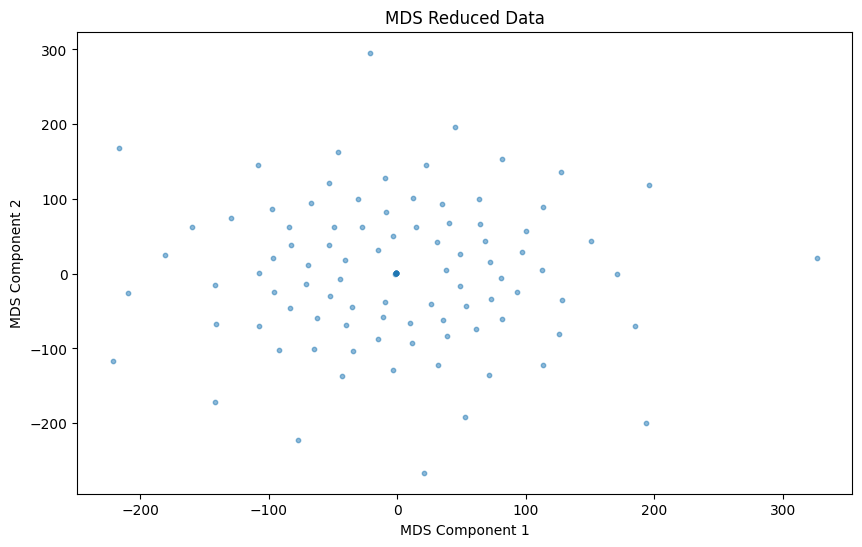

In [22]:
# Meme methodes d avant mais avec l utilisation de MDS a la place de PCA
mds = MDS(n_components=2, random_state=42)
data_mds2d = mds.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(data_mds2d[:, 0], data_mds2d[:, 1], s=10, alpha=0.5)
plt.title('MDS Reduced Data')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

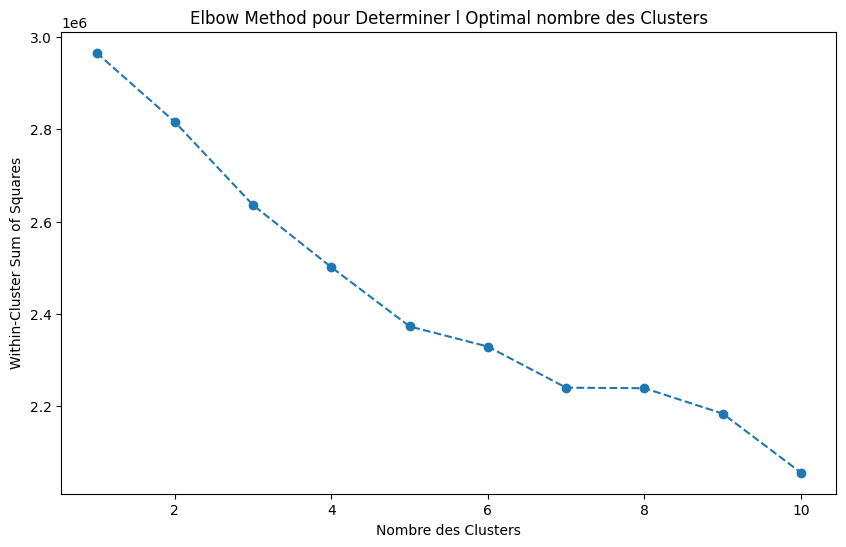

In [23]:
iso = Isomap(n_components=50)
data_iso = iso.fit_transform(normalized_data)

plot_elbow_method(data_iso, max_clusters=10)

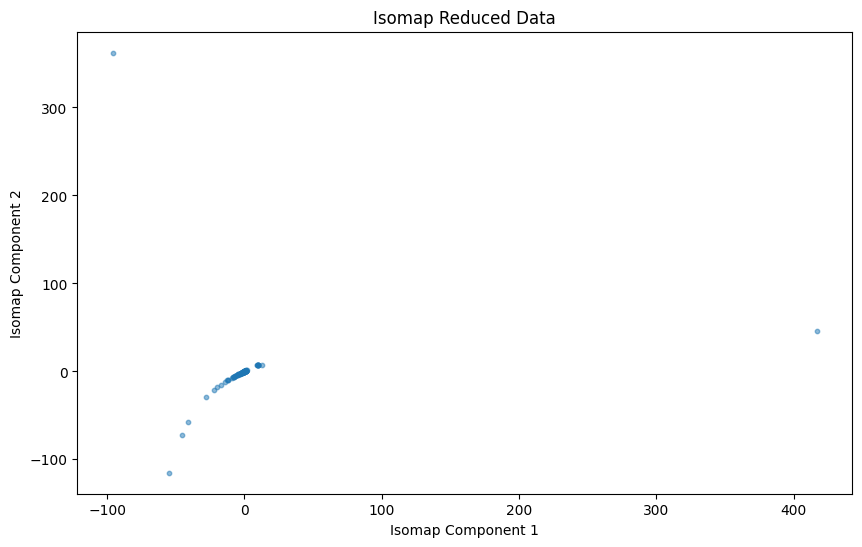

In [24]:
# Isomap au lieu de PCA
iso = Isomap(n_components=2)
data_iso2d = iso.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(data_iso2d[:, 0], data_iso2d[:, 1], s=10, alpha=0.5)
plt.title('Isomap Reduced Data')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.show()

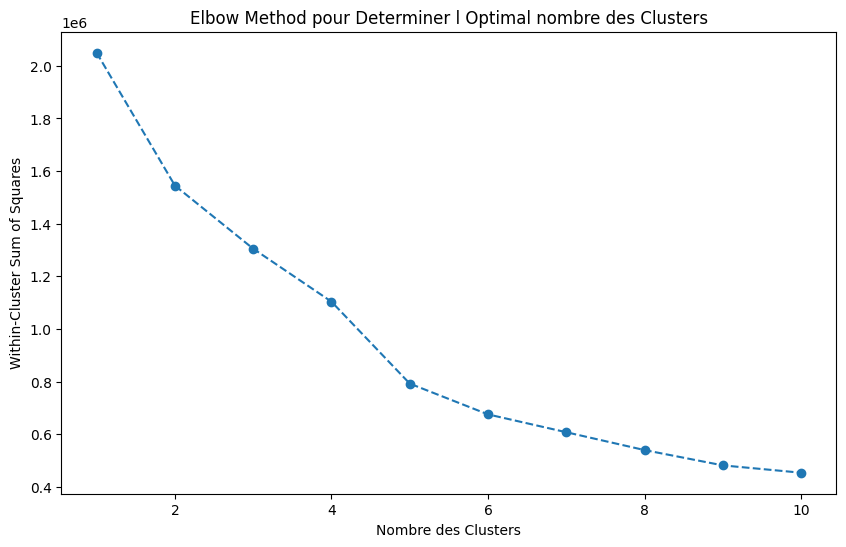

In [25]:
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(normalized_data)
plot_elbow_method(data_tsne, max_clusters=10)

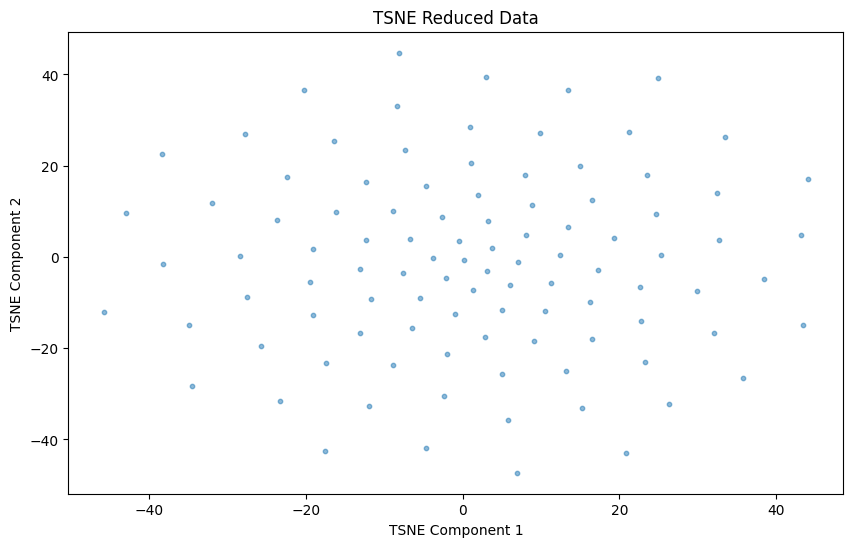

In [26]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne2d = tsne.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne2d[:, 0], data_tsne2d[:, 1], s=10, alpha=0.5)
plt.title('TSNE Reduced Data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


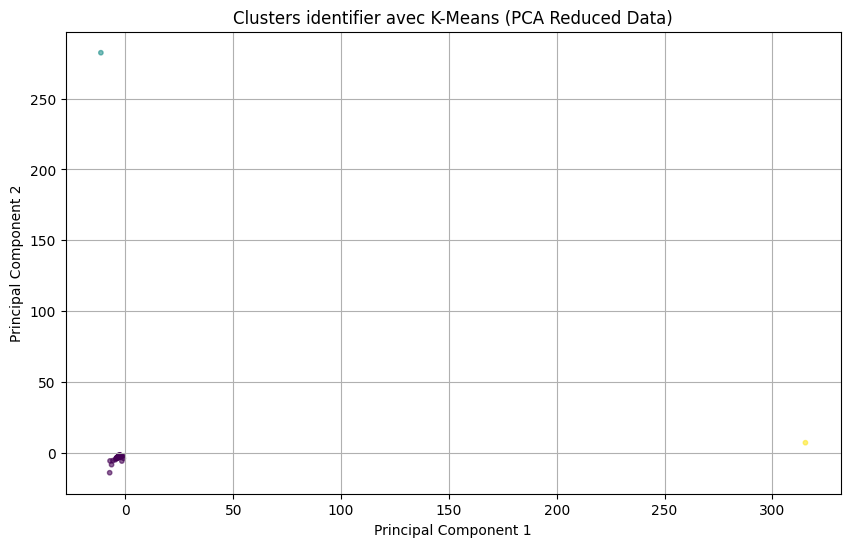

In [27]:
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.6)
plt.title("Clusters identifier avec K-Means (PCA Reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [28]:
silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)
silhouette_kmeans


0.5312086196659533

# K-MEDOIDS

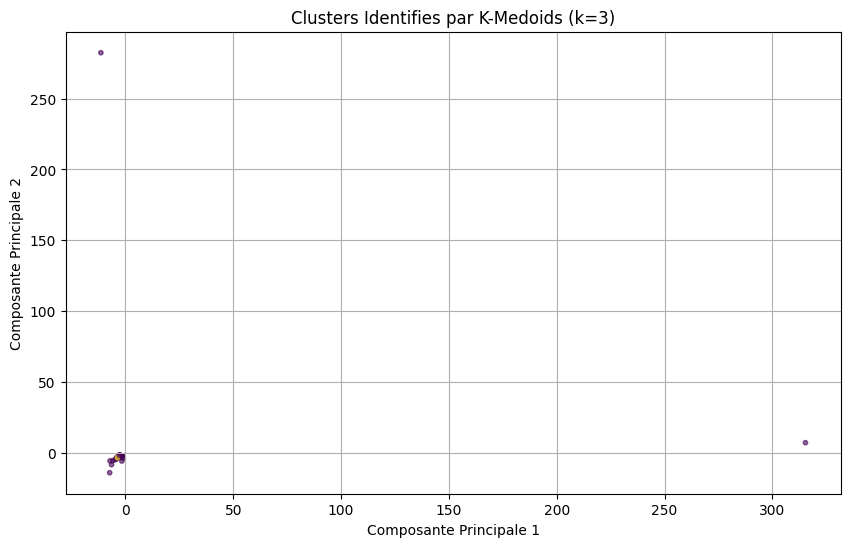

Resultats pour K-Medoids :
 - Score Silhouette: 0.2342


In [29]:
def kmedoids_analysis(data, n_clusters=3, init='k-medoids++'):

    kmedoids = KMedoids(n_clusters=n_clusters, init=init, metric='manhattan', random_state=42)
    kmedoids_labels = kmedoids.fit_predict(data)

    silhouette_avg = silhouette_score(data, kmedoids_labels)

    result = {
        'Labels': kmedoids_labels,
        'Silhouette Score': silhouette_avg
    }

    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=kmedoids_labels, cmap='viridis', s=10, alpha=0.6)
    plt.title(f"Clusters Identifies par K-Medoids (k={n_clusters})")
    plt.xlabel("Composante Principale 1")
    plt.ylabel("Composante Principale 2")
    plt.grid(True)
    plt.show()

    return result

kmedoids_results = kmedoids_analysis(data_pca)

print(f"Resultats pour K-Medoids :")
print(f" - Score Silhouette: {kmedoids_results['Silhouette Score']:.4f}")


# DBSCAN

> * DBSCAN is still finding only one cluster or categorizing the points as noise this may indicate that the data doesn't have the density-based structure DBSCAN is designed to detect so we can t calculate the silhouette score

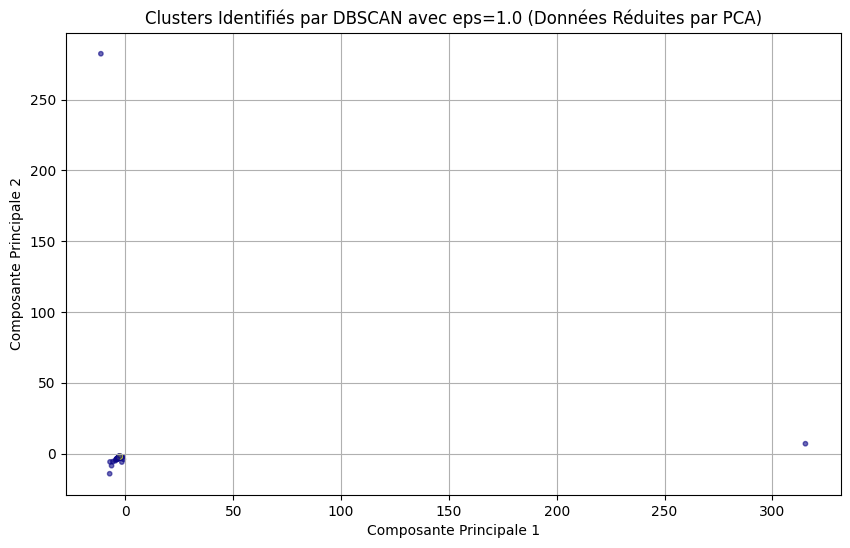

Seulement un cluster détecté; impossible de calculer le score de silhouette.


In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Application de DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='plasma', s=10, alpha=0.6)
plt.title("Clusters Identifiés par DBSCAN avec eps=1.0 (Données Réduites par PCA)")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.grid(True)
plt.show()

# Vérification du nombre de clusters
unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

if n_clusters > 1:
    # Calcul du score de silhouette en excluant les points marqués comme bruit
    valid_indices = dbscan_labels != -1  # Points non marqués comme bruit
    silhouette_dbscan = silhouette_score(data_pca[valid_indices], dbscan_labels[valid_indices])
    print(f"Silhouette Score pour DBSCAN : {silhouette_dbscan:.3f}")
elif n_clusters == 1:
    print("Seulement un cluster détecté; impossible de calculer le score de silhouette.")
else:
    print("Tous les points sont considérés comme du bruit; impossible de calculer le score de silhouette.")


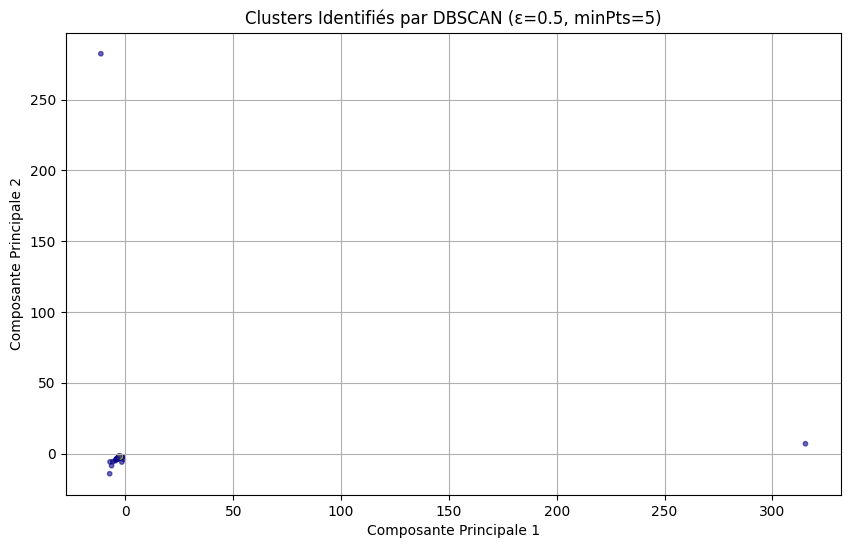

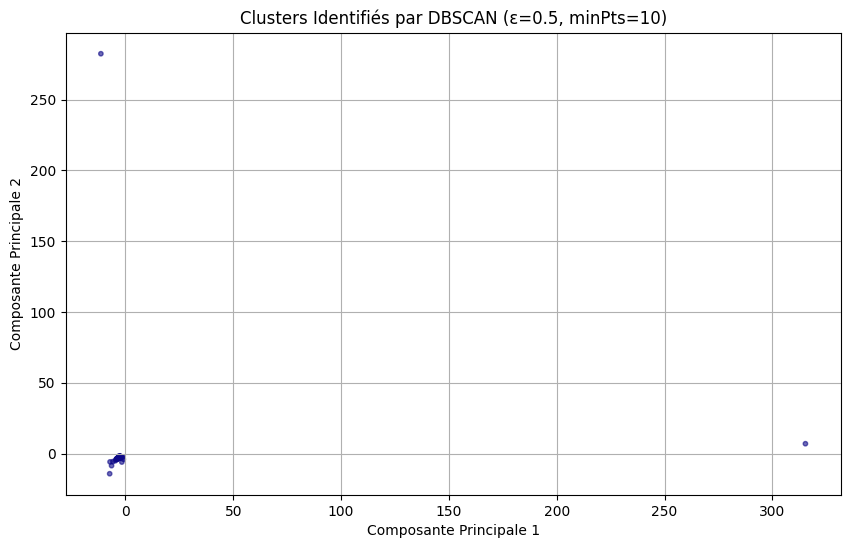

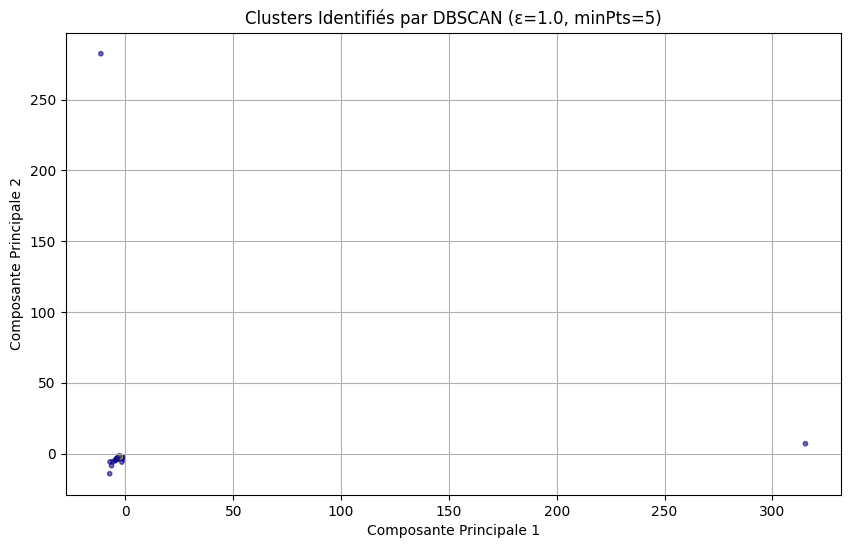

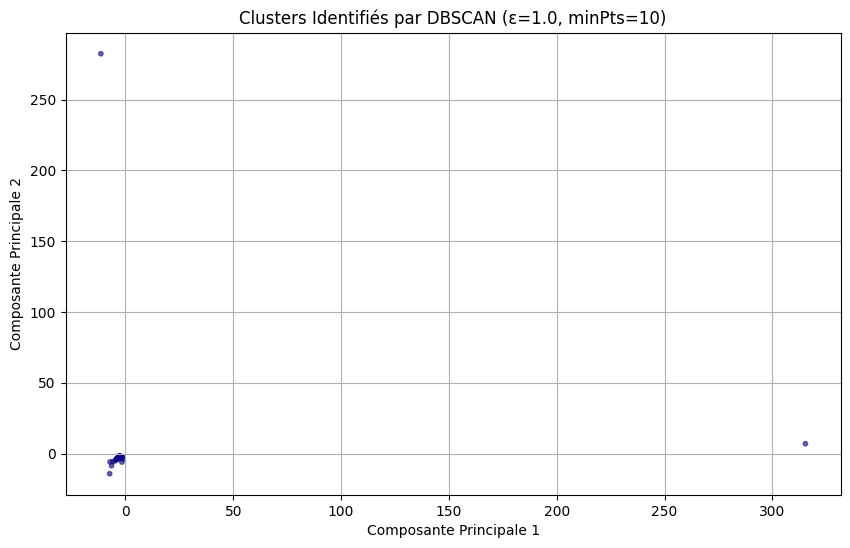

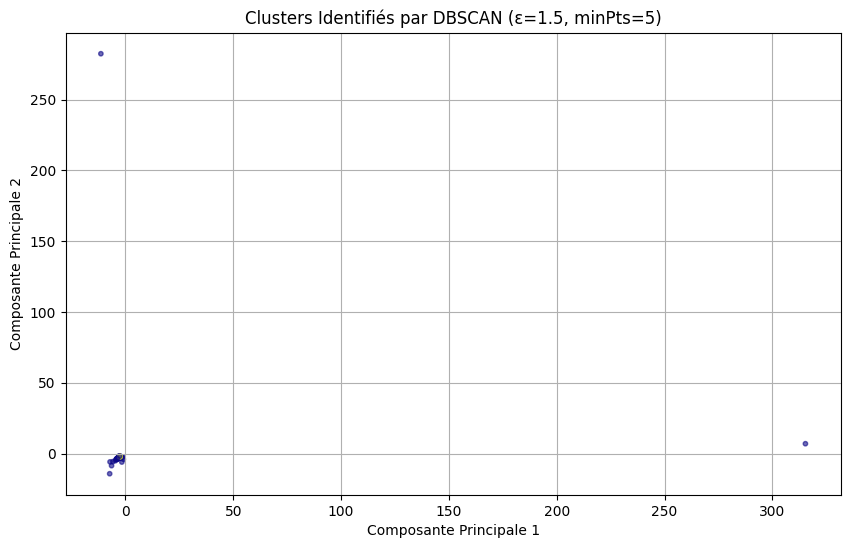

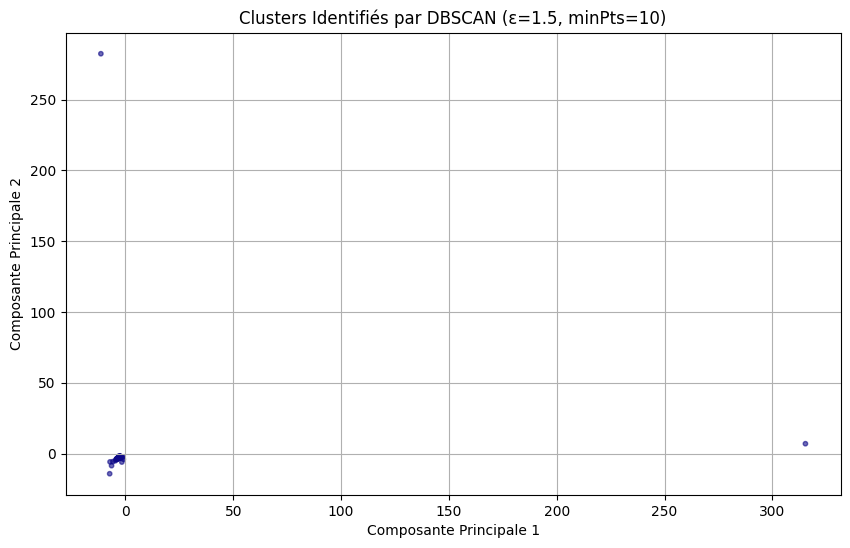

Résultats pour DBSCAN (ε=0.5, minPts=5):
 - Labels: [-1  0]
 - Score Silhouette: Non Applicable


Résultats pour DBSCAN (ε=0.5, minPts=10):
 - Labels: [-1]
 - Score Silhouette: Non Applicable


Résultats pour DBSCAN (ε=1.0, minPts=5):
 - Labels: [-1  0]
 - Score Silhouette: Non Applicable


Résultats pour DBSCAN (ε=1.0, minPts=10):
 - Labels: [-1]
 - Score Silhouette: Non Applicable


Résultats pour DBSCAN (ε=1.5, minPts=5):
 - Labels: [-1  0]
 - Score Silhouette: Non Applicable


Résultats pour DBSCAN (ε=1.5, minPts=10):
 - Labels: [-1]
 - Score Silhouette: Non Applicable




In [33]:
def dbscan_analysis(data, eps_values=[0.5, 1.0, 1.5], min_samples_values=[5, 10]):
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(data)

            if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels and len(set(dbscan_labels)) > 2:
                silhouette_avg = silhouette_score(data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
            else:
                silhouette_avg = "Non Applicable"

            result = {
                'Epsilon': eps,
                'Min Samples': min_samples,
                'Labels': dbscan_labels,
                'Silhouette Score': silhouette_avg
            }
            results.append(result)

            plt.figure(figsize=(10, 6))
            plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='plasma', s=10, alpha=0.6)
            plt.title(f"Clusters Identifiés par DBSCAN (ε={eps}, minPts={min_samples})")
            plt.xlabel("Composante Principale 1")
            plt.ylabel("Composante Principale 2")
            plt.grid(True)
            plt.show()

    return results

dbscan_results = dbscan_analysis(data_pca, eps_values=[0.5, 1.0, 1.5], min_samples_values=[5, 10])

for result in dbscan_results:
    print(f"Résultats pour DBSCAN (ε={result['Epsilon']}, minPts={result['Min Samples']}):")
    print(f" - Labels: {np.unique(result['Labels'])}")
    print(f" - Score Silhouette: {result['Silhouette Score']}")
    print("\n")


# GMM

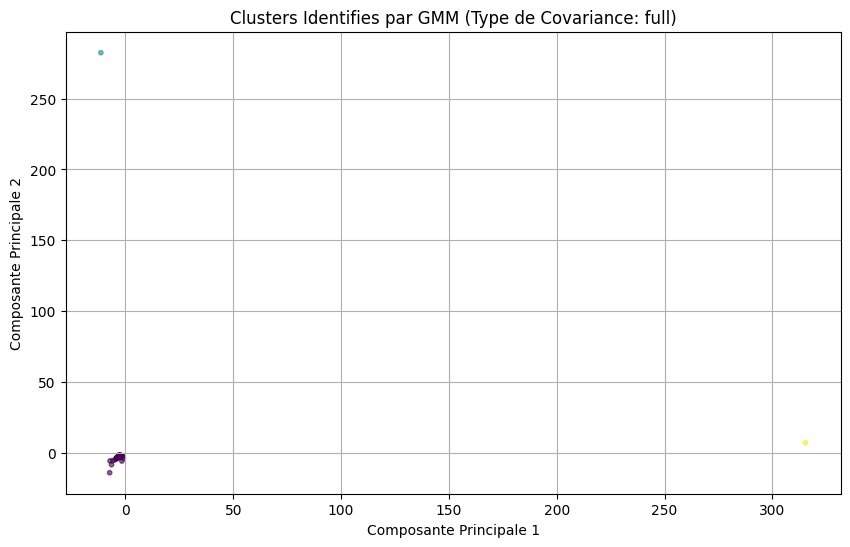

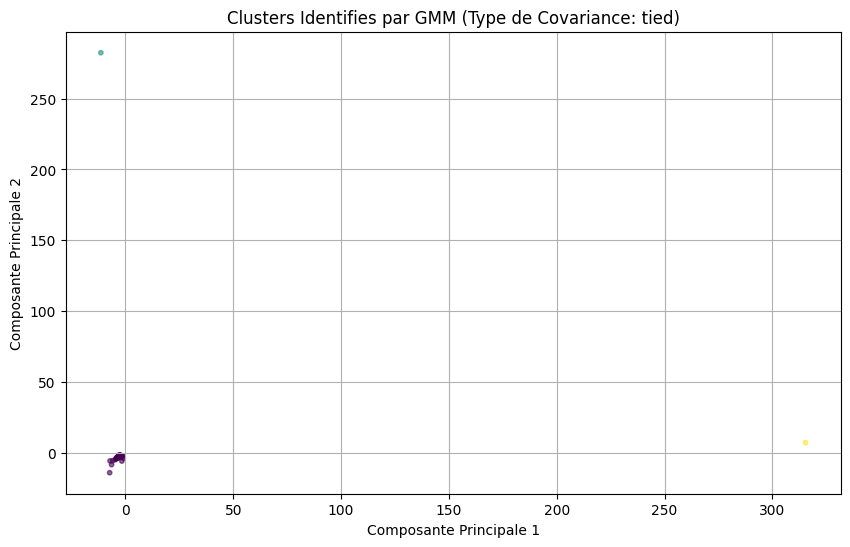

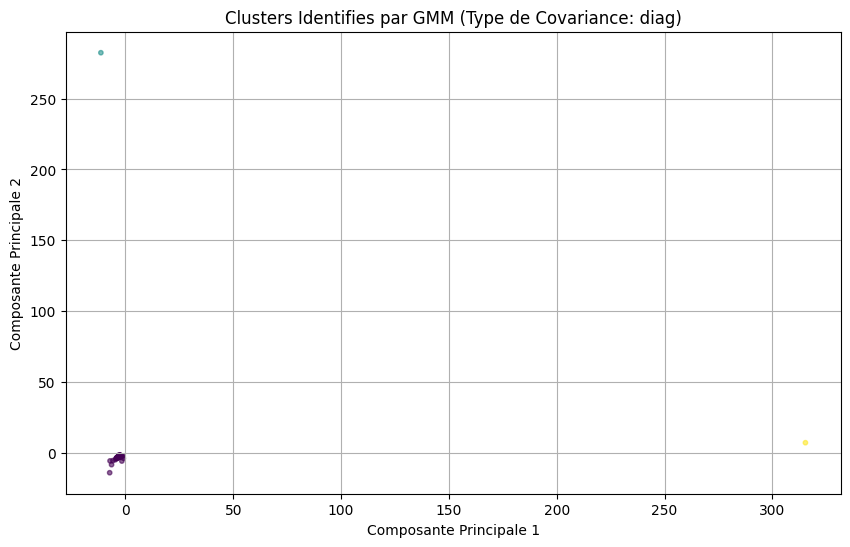

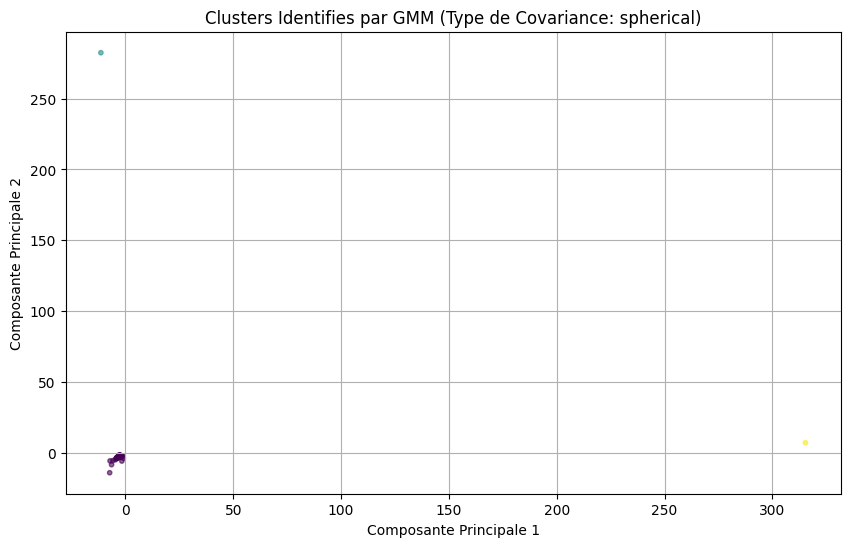

Resultats pour le Type de Covariance 'full':
 - Log-Likelihood: -19061.682444247308
 - Score Silhouette: 0.5312


Resultats pour le Type de Covariance 'tied':
 - Log-Likelihood: -20011.064981412976
 - Score Silhouette: 0.5312


Resultats pour le Type de Covariance 'diag':
 - Log-Likelihood: -19376.569524588802
 - Score Silhouette: 0.5312


Resultats pour le Type de Covariance 'spherical':
 - Log-Likelihood: -20077.378967706147
 - Score Silhouette: 0.5312




In [34]:
def gmm_analysis(data, n_components=3, covariance_types=['full', 'tied', 'diag', 'spherical']):
    results = {}

    for cov_type in covariance_types:

        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, init_params='kmeans', random_state=42)
        gmm_labels = gmm.fit_predict(data)

        log_likelihood = gmm.score(data) * len(data)

        if len(set(gmm_labels)) > 1:
            silhouette_avg = silhouette_score(data, gmm_labels)
        else:
            silhouette_avg = None

        results[cov_type] = {
            'Labels': gmm_labels,
            'Log-Likelihood': log_likelihood,
            'Silhouette Score': silhouette_avg
        }

        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', s=10, alpha=0.6)
        plt.title(f"Clusters Identifies par GMM (Type de Covariance: {cov_type})")
        plt.xlabel("Composante Principale 1")
        plt.ylabel("Composante Principale 2")
        plt.grid(True)
        plt.show()

    return results

gmm_results = gmm_analysis(data_pca, n_components=3)

gmm_results

for cov_type in gmm_results:
    labels = gmm_results[cov_type]['Labels']
    log_likelihood = gmm_results[cov_type]['Log-Likelihood']
    silhouette = gmm_results[cov_type]['Silhouette Score']

    print(f"Resultats pour le Type de Covariance '{cov_type}':")
    print(f" - Log-Likelihood: {log_likelihood}")
    if silhouette is not None:
        print(f" - Score Silhouette: {silhouette:.4f}")
    else:
        print(f" - Score Silhouette: Non Applicable (un seul cluster trouvé)")
    print("\n")
